In [19]:
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import trange

from config import CFG_CNN
from utils import MNIST, wandb_init

trainDataset = MNIST('dataset/MNIST/raw', "train-images-idx3-ubyte.gz",
                     "train-labels-idx1-ubyte.gz", transform=transforms.ToTensor())
testDataset = MNIST('dataset/MNIST/raw', "t10k-images-idx3-ubyte.gz",
                    "t10k-labels-idx1-ubyte.gz", transform=transforms.ToTensor())

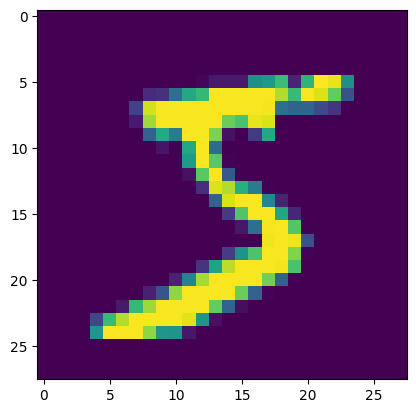

In [41]:
image,label = trainDataset[0]
image = image.numpy().transpose(1,2,0)
plt.imshow(image)

In [26]:
dict = {"0":0,"1":0,"2":0,"3":0,"4":0,"5":0,"6":0,"7":0,"8":0,"9":0}
for img,label in testDataset:
    dict[str(label)] += 1
for k,v in dict.items():
    print(k,v)

0 980
1 1135
2 1032
3 1010
4 982
5 892
6 958
7 1028
8 974
9 1009


In [27]:
import plotly.graph_objs as go

In [28]:
# 将字典的键和值分别作为标签和数值存储到两个列表中
labels = list(dict.keys())
values = list(dict.values())

# 创建饼图数据
pie = go.Pie(labels=labels, values=values)

# 创建图表布局
layout = go.Layout(title='testDataset')

# 绘制饼图
fig = go.Figure(data=[pie], layout=layout)
fig.show()

In [36]:
# 加载数据
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

loader = torch.utils.data.DataLoader(testDataset, batch_size=1, shuffle=False)

# 提取特征和标签
features = []
labels = []
for feature, label in loader:
    feature = feature.view(-1)
    features.append(feature.numpy())
    labels.append(label.numpy()[0])

# 对特征进行降维
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features)

# 绘制散点图


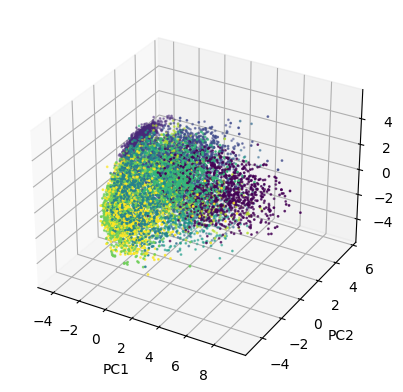

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], c=labels,s=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()